# Part IA Paper 1/2 (Mechanical Vibration)


## Question

Consider a mass-spring-dashpot oscillator, with a natural frequency 100 Hz and a damping factor $\zeta = 0.03$. Write a Python program to draw a graph of the impulse response, from P7 of the Mechanics Data Book, as a function time over the period 0.4 s, with a time step 0.0003 s. With the same time axis, make a vector of values of a sinusoidal signal at a chosen frequency $f$, then use the NumPy function `convolve` to calculate the response of the oscillator to this input signal by convolution. Explore the cases $f = 80, 100, 110, 150$ Hz. In each case identify the transient and the steady harmonic response.

## Solution 

We first compute the response of the system using the expression the data book.

In [1]:
# Import NumPy
import numpy as np

# Damping coefficient
zeta = 0.03

# Natural frequency and damped natural frequency (in rad/s)
wn = 100.0*2.0*np.pi
wd = wn*np.sqrt(1.0 - zeta*zeta)

# Create time steps from 0.0 to 0.4, with increments of dt=0.0003
dt = 0.0003
t = np.arange(0.0, 0.4, dt)

# Compute impulse response
y = np.exp(-zeta*wn*t)*np.sin(wd*t)/(np.sqrt(1.0 - zeta*zeta))

We now plot the response as a function of time,

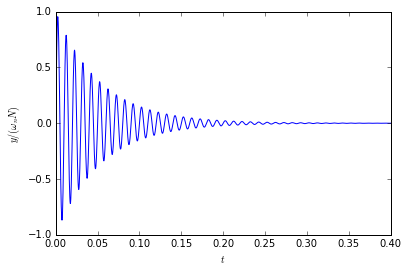

In [2]:
# Special command for plotting inside a Jupyter notebook
%matplotlib inline 

# Import Matplotlib
import matplotlib.pyplot as plt

# Plot impulse response
plt.xlabel('$t$')
plt.ylabel('$y/(\omega_{n} N)$')
plt.plot(t, y);

We now use convolution to compute the response of the system under sinusoidal forcing at a range of frequencies, based on the impulse response.

In [3]:
# Array of signal frequencies, converted to rad/s
frequencies = 2.0*np.pi*np.array([80.0, 100.0, 110.0, 150.0])

# For each frequency, compute signal, perform convolution and plot
# response
plt.xlabel('$t$')
plt.ylabel('$y/(\omega_{n} N)$')
for f in frequencies:
    # Compute forcing term
    forcing = np.sin(f*t)
    conv = np.convolve(y, forcing)*dt
    plt.plot(t, conv[0:len(t)], label=str(f/(2.0*np.pi))+'Hz');
plt.legend(loc='upper right');